In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [9]:
with open('data_shaker.csv') as file:
    data_shaker = pd.read_csv(file, delimiter=' ')

with open('data_rascheska.csv') as file:
    data_rascheska = pd.read_csv(file, delimiter=' ')

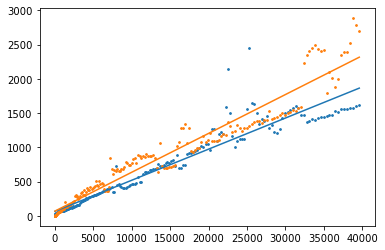

In [10]:
size1 = data_shaker['size']
time1 = data_shaker['time']

size2 = data_rascheska['size']
time2 = data_rascheska['time']

def mapping(x, a, b):
    return a * x + b

popt1, _ = curve_fit(mapping, size1 ** 2, time1)
popt2, _ = curve_fit(mapping, size2 ** 2, time2)

a1, b1 = popt1
a2, b2 = popt2

x = np.linspace(min(*(size1**2), *(size2**2)), max(*(size1**2), *(size2**2)), 1000)

plt.scatter(size1 ** 2, time1, s = 3)
plt.scatter(size2 ** 2, time2, s = 3)

plt.plot(x, mapping(x, a1, b1))
plt.plot(x, mapping(x, a2, b2))

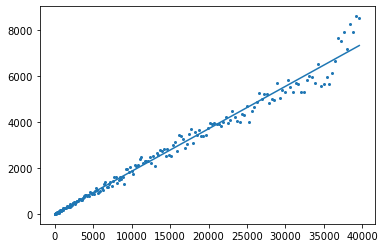

In [11]:
size2 = data_rascheska['size']
perm2 = data_rascheska['perm']

def mapping(x, a, b):
    return a * x + b

popt2, _ = curve_fit(mapping, size2**2, perm2)
a2, b2 = popt2

x = np.linspace(min(*(size1**2), *(size2**2)), max(*(size1**2), *(size2**2)), 1000)
plt.scatter(size2 ** 2, perm2, s = 4)
plt.plot(x, mapping(x, a2, b2))

plt.show()

In [12]:
with open('data_shell_geometry.csv') as file:
    data_geometry = pd.read_csv(file, delimiter=' ')
with open('data_shell_habbibi.csv') as file:
    data_habbibi = pd.read_csv(file, delimiter=' ')
with open('data_shell_fibonacchi.csv') as file:
    data_fibo = pd.read_csv(file, delimiter=' ')

geometry:  2.5102655268254837
hibbard:  1.1010388522472963
fibonacchi:  1.285935500362266


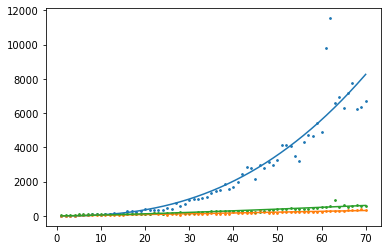

In [13]:
size_geom = data_geometry['size'][:70]
time_geom = data_geometry['time'][:70]

size_hab = data_habbibi['size'][:70]
time_hab = data_habbibi['time'][:70]

size_fibo = data_fibo['size'][:70]
time_fibo = data_fibo['time'][:70]

def mapping1(x, a, p):
    return a * x ** p

popt_geom, _ = curve_fit(mapping1, size_geom, time_geom)
a_geom, p_geom = popt_geom

popt_hab, _ = curve_fit(mapping1, size_hab, time_hab)
a_hab, p_hab = popt_hab

popt_fibo, _ = curve_fit(mapping1, size_fibo, time_fibo)
a_fibo, p_fibo = popt_fibo

x = np.linspace(min(*size_geom, *size_hab, *size_fibo), max(*size_geom, *size_hab, *size_fibo), 1000)

plt.scatter(size_geom, time_geom, s = 3)
plt.plot(x, a_geom * x ** p_geom)

plt.scatter(size_hab, time_hab, s = 3)
plt.plot(x, a_hab * x ** p_hab)

plt.scatter(size_fibo, time_fibo, s = 3)
plt.plot(x, a_fibo * x ** p_fibo)

print("geometry: ", p_geom)
print("hibbard: ", p_hab)
print("fibonacchi: ", p_fibo)

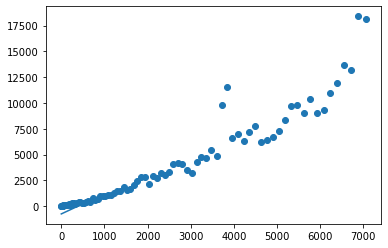

In [14]:
size_geom = data_geometry['size']
time_geom = data_geometry['time']

def func(x, a, b):
    return a * x + b

popt3, _ = curve_fit(func, size_geom**2, time_geom)
a3, b3 = popt3
x = np.linspace(min(*(size_geom**2), max(*(size_geom**2))), 1000)
plt.scatter(size_geom**2, time_geom)
plt.plot(x, a3 * x + b3)